In [1]:
# import common
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pylab as plt
from statsmodels.stats import weightstats
from statsmodels.stats import proportion
import statsmodels.formula.api as smf

data_path = "../data/"

#### 1. 대한민국의 50원 짜리 동전의 무게는 4.16 그램으로 정해져 있다. 15개의 표본 동전을 선택하여 측정한 결과 평균 무게는 4.02 그램이고 표준편차는 0.040그램이다. (표본 무게의 분포가 대칭의 형태라고 가정하자.) 평균무게가 정해진 기준보다 작다고 5% 유의수준에서 말할 수 있는가? 가설검정 과정을 통해 답하시오.

#### n = 15
#### x_bar = 4.02
#### s = 0.040
#### t = x_bar- /(s/np.sqrt(n))
#### Ho: m=4.16
#### H1: m<4.16

In [2]:
T = (4.02-4.16)/(0.040/np.sqrt(15))
print(T)

-13.555441711726013


In [3]:
stats.t.cdf(T, 14) # cdf: cumulative distribution function누적 분포 함수, 14와 T의 차이


9.639968342159571e-10


#### 2. `airbnb.csv` 데이터셋을 사용하여 샌프란시스코 전체 리스팅의 `reviews_per_month`의 평균을 99% 신뢰구간으로 추정하고 해석하시오. 

In [4]:
airbnb = pd.read_csv(data_path+'airbnb.csv')

In [5]:
airbnb_rpm = weightstats.DescrStatsW(airbnb.reviews_per_month)
airbnb_rpm.tconfint_mean(alpha=0.01)
# airbnb데이터에서 reviews_per_month의 평균의 99%는 (1.819332013710772, 1.9571692147904567)에 위치한다.



(1.819332013710772, 1.9571692147904567)

#### 3. houseprice.csv는 주택판매가격(price)과 이에 영향을 줄 것으로 판단되는 4가지 설명변수인 세금(tax; 만원), 대지평수(ground; 평), 건물평수(floor; 평), 주택연령(year; 년)을 27개 주택에 대해 조사한 것이다. 


In [6]:
house = pd.read_csv(data_path+"houseprice.csv")

In [7]:
house.head()

,price,tax,ground,floor,year
0,12.95,98.352,34.72,19.96,4.2
1,14.75,100.416,35.31,30.00,6.2
2,13.95,90.858,22.75,23.50,4.0
3,12.95,91.146,40.50,24.64,5.4
4,14.95,101.194,44.55,22.42,4.2


In [8]:
house.shape

(27, 5)

#### (a)  주택 가격과 세금 간의 산점도와 상관계수를 구하시오. 두 변수 간의 선형관계가 존재하는가? 산점도 행렬을 보면 3개의 특이한 관측치가 나타난다. 이들 값의 특성은 무엇인가?

In [9]:
house.corr()

,price,tax,ground,floor,year
price,1.000000,0.915249,0.726335,0.928827,-0.310290
tax,0.915249,1.000000,0.686850,0.832415,-0.371172
ground,0.726335,0.686850,1.000000,0.703269,-0.380275
floor,0.928827,0.832415,0.703269,1.000000,-0.178057
year,-0.310290,-0.371172,-0.380275,-0.178057,1.000000


##### 주택가격과 세금간의 상관계수는 0.915249

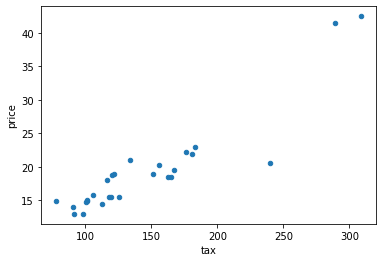

In [10]:
house.plot(x='tax',y='price',kind='scatter')
plt.show()

#####  

#### (b) 주택 가격을 종속변수로 하고 세금을 설명변수로 하는 단순선형회귀모형을 적합하여 적합된 회귀식을 쓰시오. 

In [11]:
model = smf.ols('price~tax', data = house).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     129.0
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           2.31e-11
Time:                        17:49:40   Log-Likelihood:                -66.382
No. Observations:                  27   AIC:                             136.8
Df Residuals:                      25   BIC:                             139.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7907      1.556      1.794      0.085      -0.413       5.994
tax            0.1136      0.010     11.359      0.000       0.093       0.134
==============================================================================
Omnibus:                       11.576   Durbin-Watson:                   1.335
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.951
Skew:                          -0.909   Prob(JB):                     0.000935
Kurtosis:                       6.016   Cond. No.                         428.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### y_hat = 2.7907 + 0.1136 * tax

#### (c) tax의 계수에 대한 95% 신뢰구간을 계산하고 해석하시오. 

In [12]:
model.conf_int(alpha=0.05)

,0,1
Intercept,-0.412993,5.994431
tax,0.092995,0.134188


#### (d) tax의 계수에 대한 가설검정을 진행하시오. 

In [13]:
# 𝐻0: beta_1 = 0
 
# 𝐻1: beta_1 != 0

# H0를 기각

#### (e) 모형의 R-square는 몇 인가? 그것의 의미는 무엇인가?

In [14]:
model.rsquared
# tax가 price의 변동성을 83% 설명한다.

0.8376815840383706

#### (f) tax가 중위수인 집의 가격을 예측하려고 한다. 신뢰구간과 예측구간을 구하고 각 구간의 의미를 해석하시오. 

In [15]:
house.tax.median()

121.862

In [16]:
pred = model.get_prediction(exog = dict(tax=house.tax.median()))
pred.summary_frame(alpha = 0.05)

# 신뢰구간 [15.375306, 17.891119]
# tax가 중위수일 때, 집의 가격의 평균은 15.375306와 17.891119 사이일 것으로 95% 확신함

# 예측구간 [10.450429, 22.815996]
# tax가 중위수인 도시에서 집의 가격은 10.450429와 22.815996 사이일 것으로 95% 확신함

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,16.633213,0.610771,15.375306,17.891119,10.450429,22.815996
